# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
df = pd.read_csv('Lab8_bankdata.csv', sep = ';')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

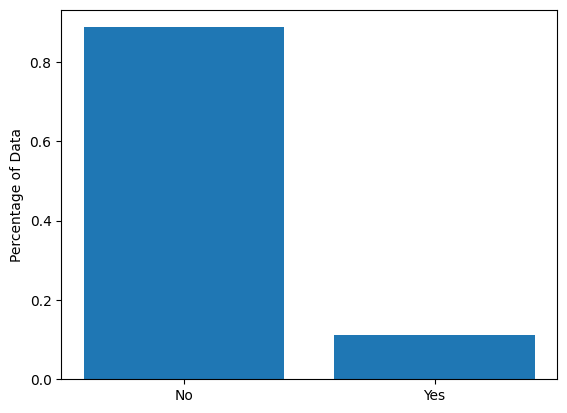

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
# test of sampling strategies

ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_scaled, y_train)
over_log = LogisticRegression().fit(over_X, over_y)
print(f'OverSampling accuracy is {over_log.score(X_test, y_test)}')

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_scaled, y_train)
under_log = LogisticRegression().fit(under_X, under_y)
print(f'UnderSampling accuracy is {under_log.score(X_test, y_test)}')

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)
smote_log = LogisticRegression().fit(smote_X, smote_y)
print(f'SmoteSampling accuracy is {smote_log.score(X_test, y_test)}')


C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OverSampling accuracy is 0.8363680504976936


C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


UnderSampling accuracy is 0.8339402767662054


C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SmoteSampling accuracy is 0.8379056405276362


In [11]:
X_scaled = scaler.inverse_transform(smote_X)
y_train = smote_y

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 211.006\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= 130.001\ngini = 0.29\nsamples = 19567\nvalue = [16126, 3441]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 0.5\ngini = 0.117\nsamples = 10620\nvalue = [9959, 661]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.098\nsamples = 10407\nvalue = [9868, 539]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.489\nsamples = 213\nvalue = [91, 122]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.998\ngini = 0.428\nsamples = 8947\nvalue = [6167, 2780]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 6482\nvalue = [3795, 2687]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.073\nsamples = 2465\nvalue = [2372, 93]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.0\ngini = 0.419\nsamples = 31593\nvalue = [9454, 22139]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 455.037\ngini = 0.339\nsamples = 25978\nvalue = [5629, 20349]\nclass =

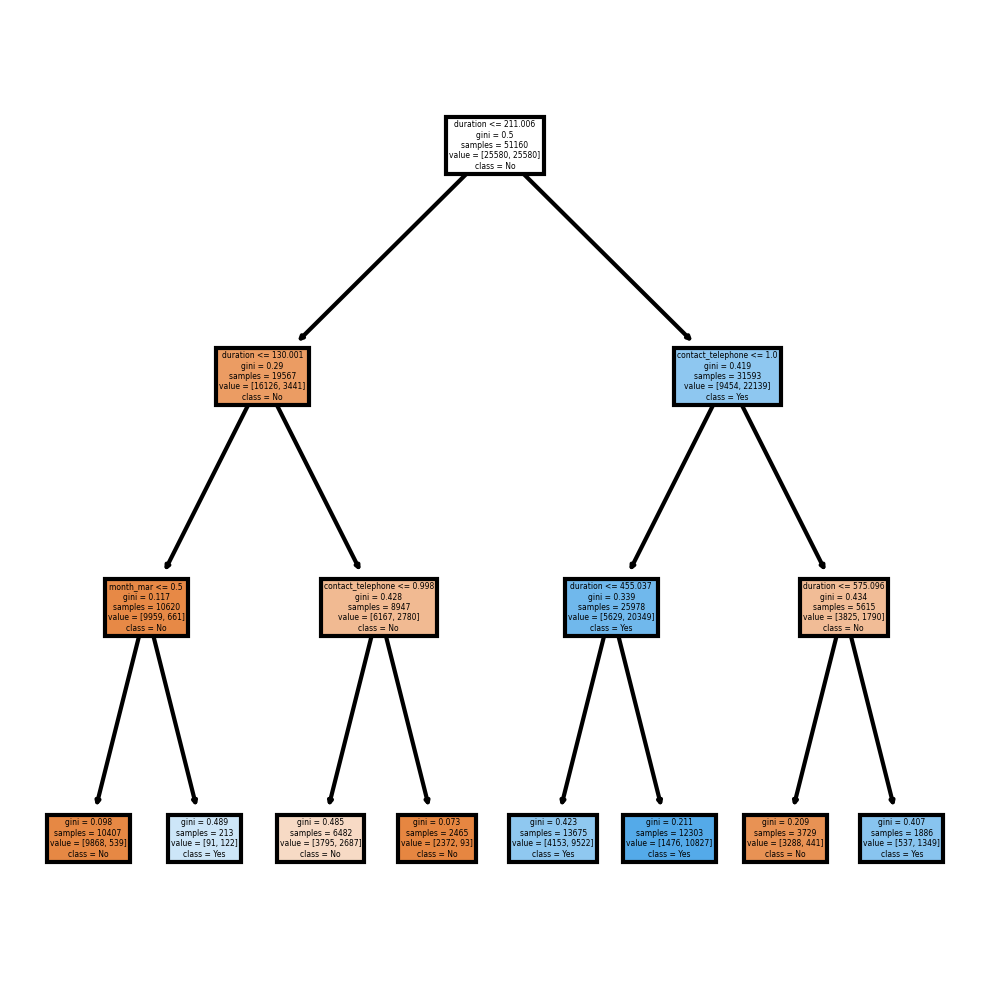

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

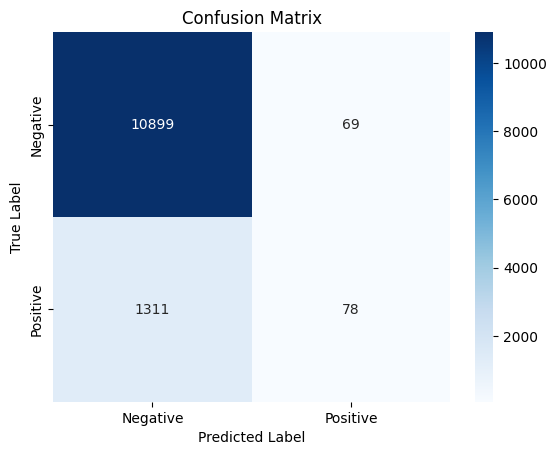

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree_main = dtree.fit(X_scaled, y_train)

In [17]:
bagging = BaggingClassifier(estimator = dtree, 
                  n_estimators = 100,
                  max_samples = 0.5,
                  max_features = 1)

bagging.fit(X_scaled, y_train)

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), max_features=1,
                  max_samples=0.5, n_estimators=100)

In [18]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

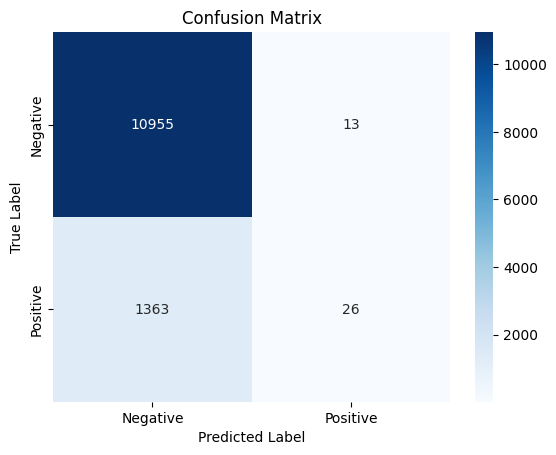

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [20]:
from sklearn.ensemble import AdaBoostClassifier

In [21]:
boost = AdaBoostClassifier(estimator = dtree, 
                  n_estimators = 100)

boost.fit(X_scaled, y_train)

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [22]:
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

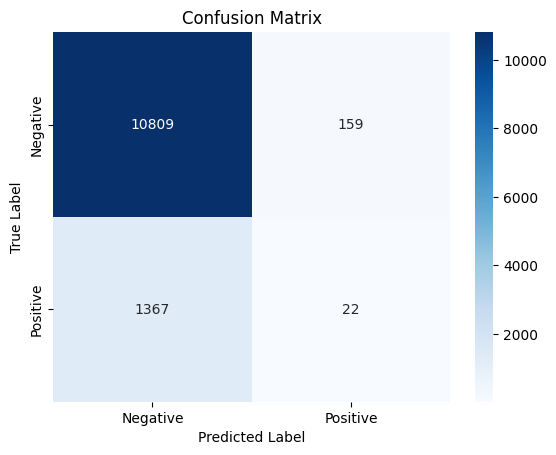

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a Logistic Regression on the Decision Tree, Bagged Tree, and Boosted Tree. Interpret coefficients and significance

In [59]:
predictions_bagging = bagging.predict(X_scaled)
predictions_boost = boost.predict(X_scaled)
predictions_dtree_main = dtree_main.predict(X_scaled)

X_base_learner = np.column_stack([predictions_bagging, predictions_boost, predictions_dtree_main])

In [60]:
super_learner = LogisticRegression()
super_learner.fit(X_base_learner, y_train)
super_learner.coef_

C:\Users\steve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.49022453, 4.64817812, 1.07110679]])

The positive coefficient for the bagging model suggests that an increase in its prediction is associated with an increase in the log-odds of the target variable being in the positive class. 

The larger coefficient for the boost model indicates a stronger influence of its prediction on the log-odds compared to the bagging model. 

The positive coefficient for the decision tree model suggests a smaller impact on the log-odds compared to the other two models.